In [1]:
import sys
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
import ants
import os
import bigbadbrain as bbb
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy
from scipy.ndimage.filters import gaussian_filter
%matplotlib inline

In [2]:
plt.rcParams.update({'font.size': 20})

In [3]:
root_directory = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/'

# Load Meanbrain

In [4]:
file = os.path.join(root_directory,
                    '2019_nov_meanbrain',
                    'meanbrain_final.nii')

meanbrain = bbb.load_numpy_brain(file)

# Reset master spacing

meanbrain = ants.from_numpy(meanbrain)
anatomy_xml = os.path.join(root_directory, 'fly_25', 'anat_0', 'anatomy.xml')
meanbrain.set_spacing(bbb.get_resolution(anatomy_xml))


~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 412.17 ms


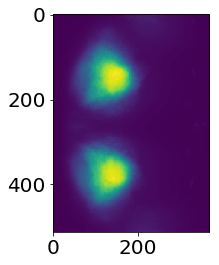

In [42]:
plt.imshow(meanbrain.numpy()[:,:,60])

# Load Template

In [7]:
template_file = os.path.join('/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190224_anatomy_central', 'meanbrain1', 'JFRCtemplate2010.nii')
template = bbb.load_numpy_brain(template_file)


~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 677.50 ms


In [8]:
# Flip Z-axis
template = template[:,:,::-1]

In [9]:
# Cut off optic lobes
template = template[200:800,:,:]

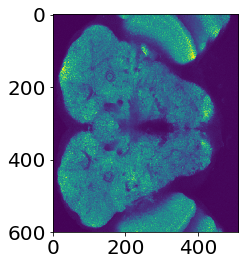

In [10]:
plt.imshow(template[:,:,80])

In [11]:
# Set resolution
template = ants.from_numpy(template)
ants.set_spacing(template, (0.622, 0.622, 0.622))

In [16]:
template

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (600, 512, 218)
	 Spacing    : (0.622, 0.622, 0.622)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

# Load Kevin's Data

In [51]:
kevin_folder = os.path.join(root_directory, '2019_nov_meanbrain', 'kevin')
kevin_template = os.path.join(kevin_folder, 'Template_Mean-aligned.nii')
kevin_template = bbb.load_numpy_brain(kevin_template)
kevin_meanbrain = os.path.join(kevin_folder, 'Meanbrain.nii')
kevin_meanbrain = bbb.load_numpy_brain(kevin_meanbrain)


~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 294.66 ms

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 369.36 ms


##### Flip z-axis

In [52]:
kevin_meanbrain = kevin_meanbrain[:,:,::-1]
kevin_template = kevin_template[:,:,::-1]

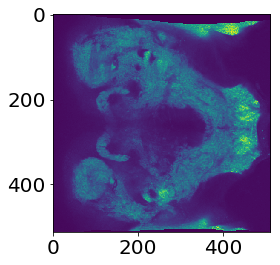

In [53]:
plt.imshow(kevin_template[:,:,40])

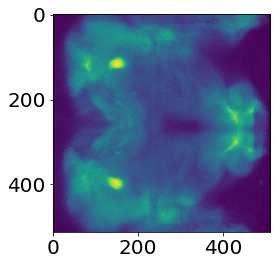

In [54]:
plt.imshow(kevin_meanbrain[:,:,70])

##### Set resolution

In [55]:
kevin_template_res = [0.62167227,0.62167227,0.59986162]
kevin_meanbrain_res = [0.62167227,0.62167227,0.59986162]

In [56]:
kevin_template = ants.from_numpy(kevin_template)
ants.set_spacing(kevin_template, kevin_template_res)

kevin_meanbrain = ants.from_numpy(kevin_meanbrain)
ants.set_spacing(kevin_meanbrain, kevin_meanbrain_res)

# Warp kevin mean to my mean

In [60]:
master = meanbrain
slave = kevin_meanbrain
kevinmean2lukemean = ants.registration(master,slave,'AffineFast')

In [61]:
save_file = os.path.join(kevin_folder, 'kevinmean2lukemean_affine.nii')
bbb.save_brain(save_file, kevinmean2lukemean['warpedmovout'].numpy())


~~ save_brain ~~
Current memory usage: 2.68GB
save_brain done. Duration: 2.15 sec
